In [1]:
import requests
from bs4 import BeautifulSoup
from  selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re
 
from time import sleep
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
path = 'C:\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(path)

In [4]:
driver.get("https://www.instagram.com/accounts/login/" )
instagram_id= getpass.getpass("Input ID : ")
instagram_pw= getpass.getpass("Input PWD : ")

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

Input ID : ········
Input PWD : ········


In [5]:
login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5) # 로그인 버튼 누르기

driver.find_element_by_css_selector('.sqdOP.yWX7d.y3zKF').click()
time.sleep(3) # 로그인 저장 나중에

driver.find_element_by_css_selector('.aOOlW.HoLwm').click()
time.sleep(3) # 설정 나중에

In [6]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 경기도파주


In [7]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(5)

In [8]:
results = []
count = 100
for i in range(count):
    data = driver.find_elements_by_css_selector('a.xil3i') # 해쉬태그 정보 저장
    for j in range(len(data)):
        results.append(data[j].text.replace("#","")) # '#'없애기

    driver.find_element_by_css_selector("div.l8mY4.feth3").click() #다음 게시물로 이동
    time.sleep(3)

<BarContainer object of 30 artists>

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)


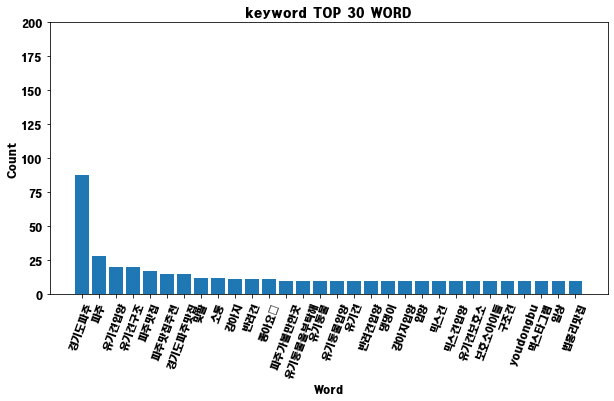

In [9]:
import nltk
 
results_str = " ".join(results) # 결과값 list to string
tokens = results_str.split(" ") # 각 단어별로 떼어 내서
text = nltk.Text(tokens) # text에 저장하고
topWord = text.vocab().most_common(30) # 가장 많이 등장하는 30개의 단어를 추려낸다.
count = 30
xlist = [a[0] for a in topWord[:count ]]
ylist = [a[1] for a in topWord[:count ]]

# 한글 폰트 설정 ( 깨짐 방지 )
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\HMKMRHD.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
    
plt.figure(figsize = (10,5)) # 그래프 크기 지정
plt.xlabel('Word') # X축 이름
plt.xticks(rotation=70) # X축 라벨 회전
plt.ylabel('Count') # Y축 이름
plt.title('keyword TOP '+str(count)+' WORD')
plt.ylim([0, 200]) # 그래프의 Y축 크기 조절
plt.bar(xlist,ylist) # bar로 실행하면 막대그래프. plot으로 실행하면 꺾은선 그래프.

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100).generate(results_str) # word cloud

(-0.5, 399.5, 199.5, -0.5)

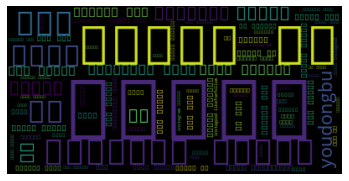

In [18]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')